In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('C:/Users/Saisa/Downloads/Walmart_Sales/data/processed/feature_engineered_sales.csv', parse_dates=['date'])
df = df.sort_values('date')

# Drop unused columns
drop_cols = ['date', 'weekly_sales', 'store', 'dept']
features = [col for col in df.columns if col not in drop_cols and df[col].dtype != 'object']
X = df[features]

# Load the model
model = joblib.load('C:/Users/Saisa/Downloads/Walmart_Sales/models/xgboost_sales_model.pkl')


In [2]:
# Use 1,000 rows for interpretation to save time
X_sample = X.sample(1000, random_state=42)


In [3]:
# Initialize SHAP Explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_sample)


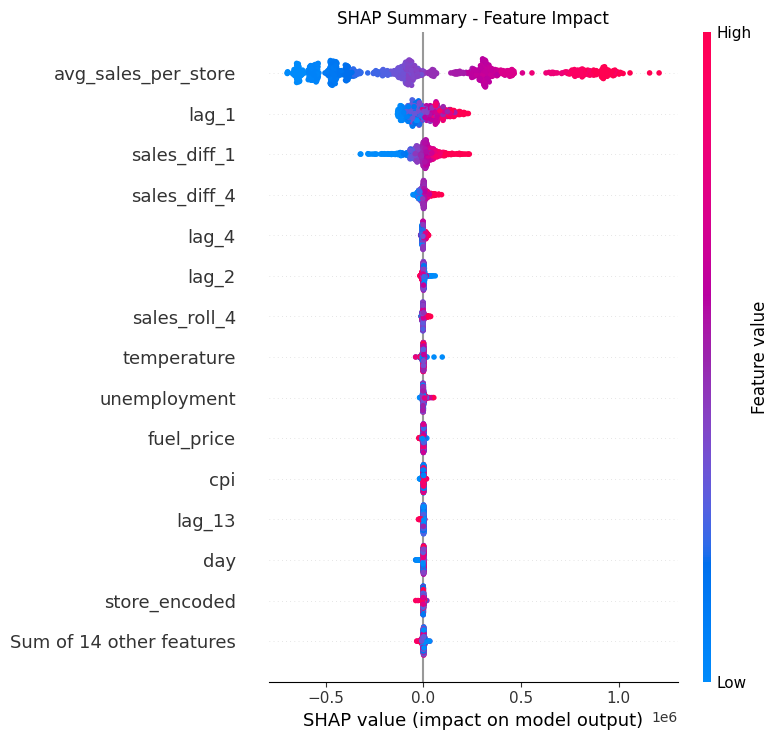

In [6]:
# Correct SHAP saving
shap.plots.beeswarm(shap_values, max_display=15, show=False)
plt.title("SHAP Summary - Feature Impact")
plt.tight_layout()
plt.savefig('C:/Users/Saisa/Downloads/Walmart_Sales/outputs/plots/shap_summary.png')
plt.show()
